In [3]:
import pandas as pd
import matplotlib as plt

# Load the data into a pandas DataFrame
df = pd.read_csv('world_population_dataset/world_population.csv')

df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
# Melt the DataFrame to combine the year columns into one "Year" column
melted_df = pd.melt(df, id_vars=['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent', 
                                 'Area (km²)', 'Density (per km²)', 'Growth Rate', 
                                 'World Population Percentage'], 
                    var_name='Year', value_name='Population')
melted_df

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022 Population,41128771
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022 Population,2842321
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022 Population,44903225
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022 Population,44273
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022 Population,79824
...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970 Population,9377
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970 Population,76371
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970 Population,6843607
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970 Population,4281671


In [5]:
# Remove 'Population' from the 'Year' column values
melted_df['Year'] = melted_df['Year'].str.replace(' Population', '')

In [6]:
melted_df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824


In [7]:
# Filter the DataFrame to include only the desired countries
countries_of_interest = ['Japan', 'China', 'United States', 'Germany', 'Nigeria']
df_filtered = melted_df[melted_df['Country/Territory'].isin(countries_of_interest)]

AttributeError: module 'matplotlib' has no attribute 'title'

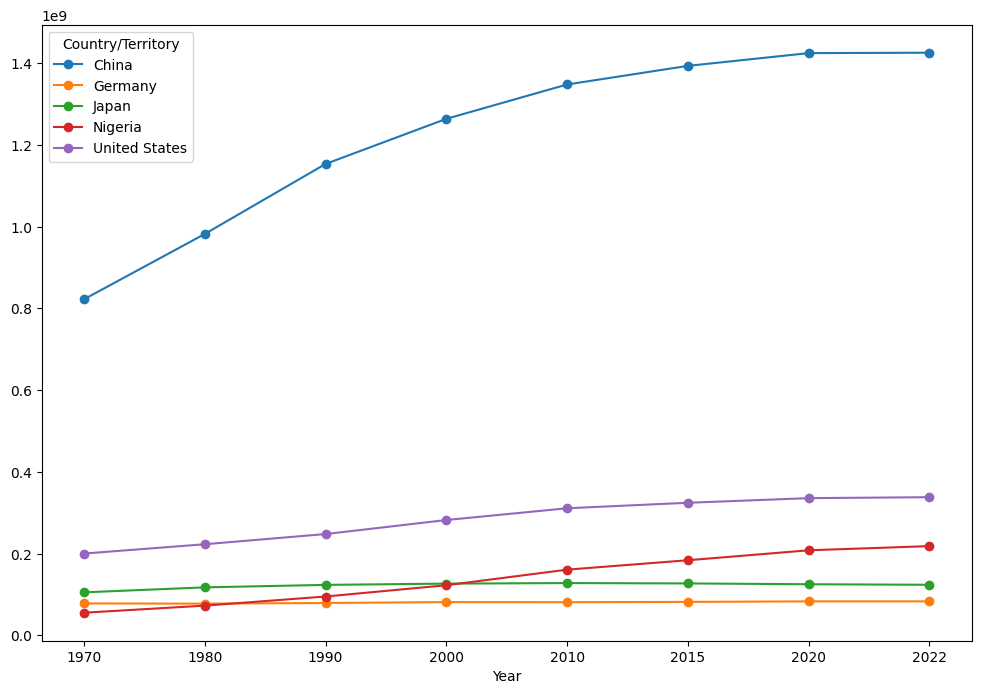

In [8]:
# Pivot the DataFrame to have years as columns and countries as rows
pivot_df = df_filtered.pivot(index='Year', columns='Country/Territory', values='Population')

# Plot the data
pivot_df.plot(kind='line', marker='o', figsize=(12, 8))

# Add labels and title
plt.title('Population of Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Country/Territory')
plt.tight_layout()
plt.show()